### **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

# 🏦 **BANK MARKETING CAMPAIGN CLASSIFICATION**

### `Initial Setup`

In [1]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library modeling


import warnings
warnings.filterwarnings('ignore')

### `Business Problem Understanding`

#### **Problem Statement**

##### **Stakeholder** 
   - Bank's Marketing Manager 
   - Bank's Marketing Team.

##### **Problem**
   
   Permasalahan dari analisis ini terkait deposito nasabah. Deposito merupakan salah satu produk dari bank di mana nasabah akan menyimpan uangnya di bank, namun untuk mencairkannya harus sesuai dengan jangka waktu yang telah ditentukan di awal. Sebagai konsekuensinya, nasabah akan mendapatkan bunga yang dilihat dari total uang yang didepositokan

   Sebagai lembaga keuangan, bank tidak boleh kehilangan nasabah deposito karena dapat mengurangi aset pada bank. Selain itu, bank juga harus mencari nasabah lain untuk membuka rekening deposito. Ketika jumlah saldo deposito meningkat, maka meningkatkan juga nominal pinjaman yang dapat diberikan kepada nasabah. Dan bank akan mendapatkan keuntungan dari bunga pinjaman tersebut. Sehingga dapat dikatakan ketika saldo deposito meningkat juga dapat meningkatkan keuntungan dari bank.
   
   Untuk sampai saat ini, pihak bank masih menilai secara manual akan nasabah yang diprediksi ingin membuka rekening deposito dan tidak ingin membuka rekening deposito. Misalkan ada total sebuah bank memiliki nasabah sejumlah 100.000 orang, dengan penilaian manual maka akan cenderung meningkatkan subjektivitas dikarenakan keterbatasan jumlah sdm. Selain itu, metode manual juga riskan terhadap kesalahan prediksi. Dan jika masih menggunakan metode manual untuk memprediksi, jika dalam satu bank hanya memiliki 20 orang marketing dan dalam 1 harinya secara efektif bisa menemukan lalu menghubungi 10 orang nasabah yang berpotensi maka akan membutuhkan waktu 500 hari. Maka dari analisis ini, pihak bank ingin mencari kategori kandidat calon nasabah yang diprediksi ingin membuka rekening deposito.

**Goals**

Dilihat dari permasalahannya, pihak bank ingin mencari kategori kandidat calon nasabah yang ingin melakukan deposito. Sehingga marketing yang akan dilakukan dapat fokus terhadap calon nasabah yang potensial (nasabah yang ingin membuka rekening deposito) untuk membuka deposito. 

Untuk itu, pihak bank membentuk suatu pola machine learning untuk mengetahui nasabah tersebut berpotensi untuk membuka rekening deposito atau tidak, serta ingin mengetahui faktor-faktor/variabel apa saja yang dimiliki atau mempengaruhi seseorang agar ingin membuka rekening deposito atau tidak. Sehingga, pihak bank bisa mendekati kategori nasabah yang sesuai untuk membuka rekening deposito.

**Analytic Approach**

Kita akan menganalisis data untuk mencari pola machine learning yang bisa membedakan kategori nasabah yang ingin membuka deposito atau tidak.

Selanjutnya, kita akan membangun model klasifikasi yang akan membantu pihak bank untuk memprediksi probabilitas nasabah ingin membuka rekening deposito atau tidak. 

**Metric Evaluation**

Target dari analisis dapat kita kategorikan:

0 : no (tidak ingin membuka rekening deposito)
<br>
1 : yes (ingin membuka rekening deposito)

**Type I Eror | False Positif**

Kondisi di mana nasabah terprediksi ingin membuka rekening deposito padahal kenyataannya tidak ingin membuka rekening deposito
**Konsekuensi** : Marketing yang dilakukan bank akan cenderung sia-sia karena tidak tepat sasaran

**Type II Eror | False Negatif**

Kondisi di mana nasabah terprediksi tidak ingin membuka rekening deposito padahal kenyataanya ingin membuka rekening deposito
**Konsekuensi** : Bank akan kehilangan keuntungan yang didapatkan dari nasabah potensial (Nasabah yang ingin membuka rekening deposito)


Sebagai gambaran dari konsekuensinya, maka kita akan mencoba menghitung dampak biaya dari asumsi tersebut:

- Jumlah orang yang tidak membuka rekening deposito 4081 orang *(sumber dari database)*
- Jumlah orang yang membuka rekenning deposito 3732 *(sumber dari database)*
- Biaya marketing untuk deposito rata-rata dari Bank adalah 1 - 3 % dari revenue [sumber](https://emiboston.com/leading-u-s-banks-boosted-marketing-spend-in-2022/)
- Minimal untuk pembukaan rekening deposito per orang sekitar $1,000 [sumber](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/)
- rata-rata bunga deposito 5.77% [sumber](https://www.theglobaleconomy.com/rankings/deposit_interest_rate/)
- rata-rata bunga pinjaman 10.42% [sumber](https://www.theglobaleconomy.com/rankings/lending_interest_rate/#:~:text=Lending%20interest%20rate%20%2D%20Country%20rankings&text=The%20average%20for%202020%20based,was%20in%20Hungary%3A%201.96%20percent.)
- Revenue adalah 3732 x $1,000 = $3,732,000
- Biaya marketing adalah 1% dari $3,732,000 sehingga menghasilkan $37,320

***Untuk Type I Eror*** :

CPM *(Cost Per Marketing)* adalah perhitungan biaya marketing oleh bank per satu nasabah yang diukur dari 

$$ CPM =  \frac {Biaya\ Marketing}{Jumlah\ Total\ Nasabah} $$

Jika dilihat dari CPM bisa dikatakan Bank akan mengeluarkan biaya marketing per nasabah $4.77 . Sehingga ketika nasabah ternyata tidak ingin membuka rekening deposito, Bank akan menyia-nyiakan biaya marketing $4.77 per nasabah.

***Untuk Type II Eror***

Pihak bank akan mendapatkan keuntungan dari nominal pinjaman yang diberikan, nominal pinjaman yang diberikan dilihat dari aset yang salah satunya didapatkan dari bertambahnya deposito.

$$ Profit\ per\ nasabah = {(Bunga\ Pinjaman\ -\ Bunga\ Deposito)\ X\ Minimum\ Pembukaan\ Deposito } $$

Sehingga pihak Bank akan berpotensi kehilangan keuntungan yang didapatkan dari setiap nasabah yang membuka rekening deposito adalah $46.5 per nasabah.

Setelah mempertimbangkan hal-hal diatas, kami merasa bahwa type I eror dan type II sama-sama penting untuk diminimalisir sehingga sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat menimimalisir keduanya. Jadi, metric yang akan digunakan untuk analisis adalah `f1-score`.


### `Data Understanding`

Data berisi tentang karakteristik nasabah yang membuka rekening deposito dan tidak membuka rekening deposito. Dataset dapat didownload pada ***[download](https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW)*** . Untuk penjelasan kolom bisa dilihat di bawah ini :

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| age | the age of the customer |
| job | the job of the customer |
| balance | amount of money in a financial repository, such as a savings or checking account |
| housing | Is the customers has housing loan |
| loan | Is the customers has personal loan |
| contact | Contact communication type |
| month | Last contact month of the year |
| campaign | Number of contacts performed during this campaign and for this client |
| pdays | Number of days after the client was contacted from the previous campaign (numeric; -1 means client was not previously contacted) |
| poutcome | Outcome of the previous marketing campaign |
| deposit | Whether the customer deposits or not |

In [2]:
data = pd.read_csv('../data/raw/data_bank_marketing_campaign.csv')
print(f'Jumlah baris dan kolom: {data.shape}')

data.sample(5)

Jumlah baris dan kolom: (7813, 11)


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2556,28,student,1925,no,no,cellular,nov,1,97,failure,yes
4519,59,services,739,no,no,cellular,jan,1,-1,unknown,yes
5616,30,admin.,265,yes,no,cellular,may,1,181,success,yes
710,59,retired,25947,no,no,cellular,aug,2,-1,unknown,no
6090,58,services,688,no,no,cellular,aug,2,-1,unknown,no


Untuk syarat utama pembuatan deposito adalah adanya **kartu identitas** dan mempunyai **rekening simpanan ataupun giro di bank**. Kartu identitas sebagi syarat karena ketika sudah mempunyai kartu identitas maka seseorang dapat dinilai akan bisa bertanggung jawab kepada dirinya sendiri. Dan kepemilikan rekening simpanan atau giro menjadi syarat utama juga karena nantinya untuk ***sharing*** bunga deposito akan masuk ke dalam rekening tersebut. Kepemilikan kartu identitas dapat dimiliki dengan syarat berusia setidaknya **18 tahun** dan kepemilikan rekening simpanan atau giro bisa dibuktikan dengan adanya saldo rekening ***(balance)***. Sebelum melakukan analisis kita akan mengecek ketersediaan data umur ***(Age)*** dan data saldo rekening ***(balance)*** dalam dataset.

In [3]:
cols = ('age', 'balance')

for i in cols:
    if i in list(data.columns) and i == 'age' and data[i].unique().min() >= 18:
        print(f"Data {i} tersedia, dan umur nasabah pada dataset tidak ada yang kurang dari 18 tahun")
    elif i in list(data.columns) and i == 'balance':
        print(f"Data {i} tersedia")
    else:
        print("Data tidak tersedia")


Data age tersedia, dan umur nasabah pada dataset tidak ada yang kurang dari 18 tahun
Data balance tersedia


Selain dari pihak nasabah, untuk merubah keinginan nasabah yang tadinya tidak ingin membuka deposito dan akhirnya membuka rekening deposito, pihak bank juga perlu melakukan interaksi kepada nasabah dan sounding bahwa salah satu produk dari bank yang bisa dinikmati oleh nasabah adalah deposito. Untuk itu kita juga perlu mengecek ketersediaan data terkait **bagaimana bank menghubungi nasabah, berapa kali campaign yang ditawarkan ke pada nasabah, dan kapan terakhir nasabah dihubungi oleh bank**.

In [4]:
data.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'poutcome', 'deposit'],
      dtype='object')

Setelah kita melihat nama-nama kolom pada dataset, kita mendapat jawaban bahwa :
* bagaimana bank menghubungi nasabah ada pada kolom **contact**
* berapa kali campaign ditawarkan pada nasabah pada kolom **campaign**
* kapan terakhir nasabah dihubungi oleh bank pada kolom **month** dan **pdays**

Kita akan melakukan kuantifikasi pada kolom **job** terhadap deposit

<Axes: ylabel='job'>

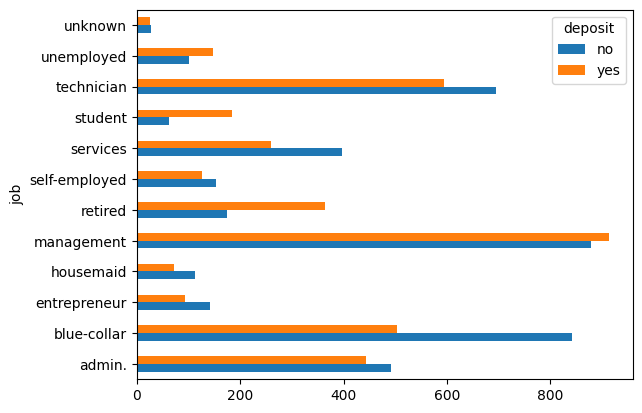

In [5]:
pd.crosstab(data['job'], data['deposit'], values=data['deposit'], aggfunc='count').plot(kind='barh')

__Insight__
<br>
Pada masing-masing **job** menunjukkan angka yang berbeda-beda jika dibandingkan dengan target (deposit), sehingga bisa dikatakan bahwa kategori **job** sedikit banyaknya juga dapat mempengaruhi seseorang untuk membuka rekening deposito

Kita akan melakukan kuantifikasi pada kolom **housing** terhadap deposit

<Axes: ylabel='housing'>

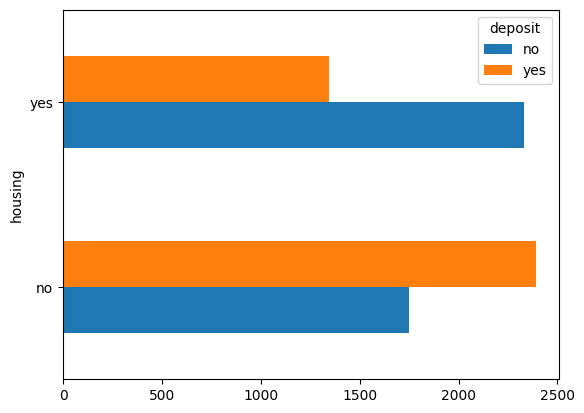

In [6]:
pd.crosstab(data['housing'], data['deposit'], values=data['deposit'], aggfunc='count').plot(kind='barh')

__Insight__
<br>
Dari data di atas bisa disimpulkan bahwa orang yang memiliki KPR/Hutang rumah cenderung tidak membuka rekening deposito. Dan orang yang tidak memiliki KPR/Hutang rumah cenderung membuka rekening deposito.

Kita akan melakukan kuantifikasi pada kolom **loan** terhadap deposit

<Axes: ylabel='loan'>

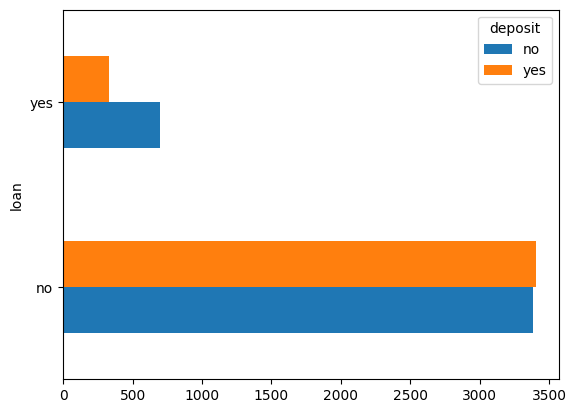

In [7]:
pd.crosstab(data['loan'], data['deposit'], values=data['deposit'], aggfunc='count').plot(kind='barh')

__Insight__
<br>
Jika dilihat dari kepemilikan hutang perorangan, orang yang tidak memiliki hutang perorangan tapi membuka rekening deposito jumlahnya hampir sama dengan orang yang tidak memiliki hutang perorangan tapi tidak membuka rekening deposito. Dan untuk orang yang memiliki hutang perorangan, cenderung tidak membuka rekening deposito.

Setelah melihat dari data yang tersedia serta melakukan percobaan model, **model yang dihasilkan belum bisa maksimal** sehingga kami memutuskan untuk menambah kolom dari data yang sama dengan tujuan agar model lebih dapat mengenali nasabah yang akan melakukan deposit dan tidak ingin melakukan deposit. ***[sumber data](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset)***

In [8]:
# import data
data2 = pd.read_csv('../data/raw/bank (1).csv')
print(f'Jumlah baris dan kolom: {data.shape}')

data2.sample(5)

Jumlah baris dan kolom: (7813, 11)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2060,27,blue-collar,single,secondary,no,513,yes,yes,cellular,18,may,351,1,-1,0,unknown,yes
9826,36,management,married,tertiary,no,539,no,no,cellular,11,aug,176,1,-1,0,unknown,no
4692,46,management,divorced,tertiary,no,1297,no,no,cellular,11,aug,716,3,-1,0,unknown,yes
2514,23,student,single,secondary,no,431,no,no,cellular,13,aug,496,2,-1,0,unknown,yes
10761,39,blue-collar,married,secondary,no,138,no,no,unknown,9,jun,61,2,-1,0,unknown,no


In [9]:
# menghapus data baru yang duplikat dengan kolom yang sudah ada 
data2 = data2.drop_duplicates(subset=list(data.columns))

# menggabungkan data 
data = pd.merge(data, data2, on=list(data.columns), how='left')

# menata ulang kolom
data = pd.DataFrame(data, columns =['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays', 'poutcome', 'marital', 'education', 'default', 'day', 'duration', 'previous', 'deposit'])
data

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,marital,education,default,day,duration,previous,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,married,secondary,no,4,94,0,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,married,tertiary,no,17,882,0,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,married,secondary,no,7,476,1,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,single,primary,no,13,531,0,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,married,secondary,no,18,176,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,married,secondary,no,3,322,0,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,married,tertiary,no,24,127,2,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,married,secondary,no,8,14,0,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,married,secondary,no,21,226,0,no


| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| age | the age of the customer |
| job | the job of the customer |
| balance | amount of money in a financial repository, such as a savings or checking account |
| housing | Is the customers has housing loan |
| loan | Is the customers has personal loan |
| contact | Contact communication type |
| month | Last contact month of the year |
| campaign | Number of contacts performed during this campaign and for this client |
| pdays | Number of days after the client was contacted from the previous campaign (numeric; -1 means client was not previously contacted) |
| poutcome | Outcome of the previous marketing campaign |
| deposit | Whether the customer deposits or not |
| **marital** | Marital status (categorical: 'divorced','married','single') |
| **education** | Education level of customer (categorical: 
| **default** | Has credit in default? (categorical: 'no','yes') |
| **day** | Last contact day (numeric) |
| **duration** | Last contact duration, in seconds (numeric) |
| **previous** | number of contacts performed before this campaign and for this client (numeric) |


 ***Nama kolom yang ditambahkan adalah nama kolom yang dicetak tebal***

Kuantifikasi pada kolom **marital** :

<Axes: ylabel='marital'>

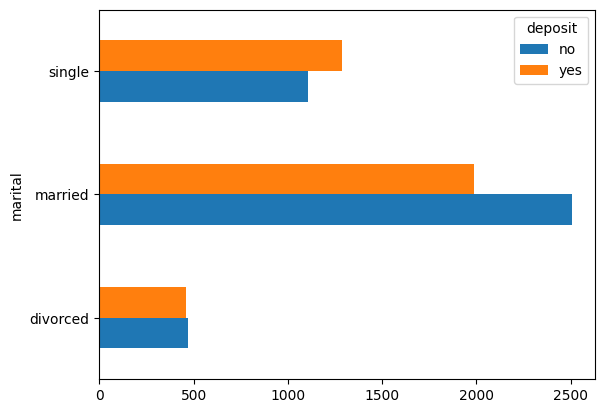

In [10]:
pd.crosstab(data['marital'], data['deposit'], values=data['deposit'], aggfunc='count').plot(kind='barh')

Kuantifikasi pada kolom **education** :

<Axes: ylabel='education'>

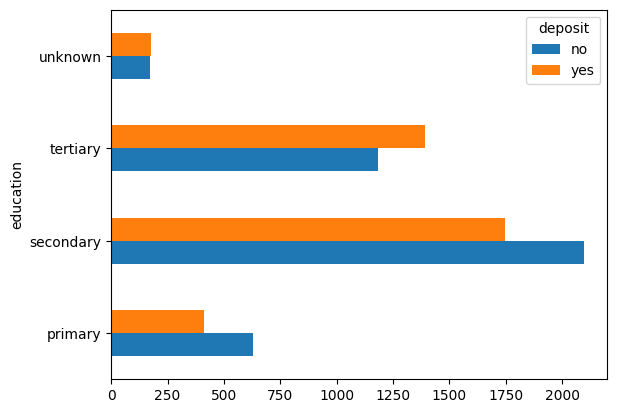

In [11]:
pd.crosstab(data['education'], data['deposit'], values=data['deposit'], aggfunc='count').plot(kind='barh')

__Insight__
<br>
Secata untuk kolom **marital** dan **education** berguna untuk lebih mengenali kategori nasabah secara deskriptif, untuk kolom marital dengan value maried jumlah nasabah yang melakukan deposito lebih besar dibandingkan value marital yang lain, dan pada kolom education value secondary jumlah nasabah yang melakukan deposito lebih besar dibandingkan value education yang lain

Kuatifikasi pada kolom **default** : 

<Axes: ylabel='default'>

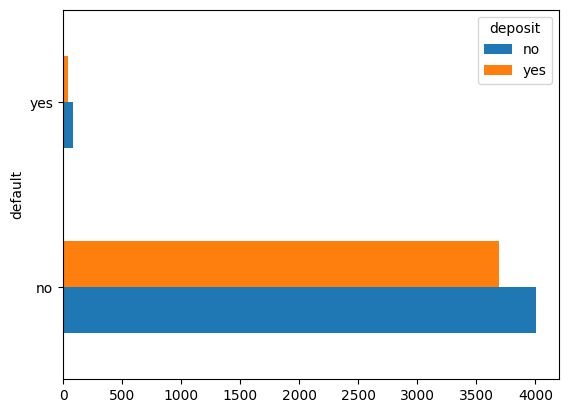

In [12]:
pd.crosstab(data['default'], data['deposit'], values=data['deposit'], aggfunc='count').plot(kind='barh')

__Insight__
<br>
Jumlah nasabah yang secara default memiliki pinjaman jumlahnya lebih sedikit dibanding nasabah yang secara default tidak memiliki pinjaman. Namun pada nasabah yang secara default tidak memiliki pinjaman, jumlah nasabah yang membuka rekening deposito lebih sedikit dibanding nasabah yang lain

Untuk kolom **days**, **duration**, **previous** digunakan untuk melengkapi data tentang bagaimana interaksi antara bank dengan nasabah. Dimana kolom **days** menjelaskan berapa hari nasabah terakhir di hubungi, kolom **duration** menjelaskan durasi terakhir bank menghubungi nasabah, dan **previous** menjelaskan jumlah berapa kali nasabah di hubungi oleh pihak bank.

Setelah melengkapi data yang ada, dataset dapat dikatakan bisa menjawab permasalahan pada **business problem** dan **goal**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 0 to 7812
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7813 non-null   int64 
 1   job        7813 non-null   object
 2   balance    7813 non-null   int64 
 3   housing    7813 non-null   object
 4   loan       7813 non-null   object
 5   contact    7813 non-null   object
 6   month      7813 non-null   object
 7   campaign   7813 non-null   int64 
 8   pdays      7813 non-null   int64 
 9   poutcome   7813 non-null   object
 10  marital    7813 non-null   object
 11  education  7813 non-null   object
 12  default    7813 non-null   object
 13  day        7813 non-null   int64 
 14  duration   7813 non-null   int64 
 15  previous   7813 non-null   int64 
 16  deposit    7813 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


#### **Initial Assesment**

In [14]:
pd.DataFrame({
    'column': data.columns.values,
    'type': data.dtypes.values,
    'n_unique': data.nunique().values,
    'min': data.min().values,
    'max': data.max().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,column,type,n_unique,min,max,sample_unique
0,age,int64,75,18,95,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,12,admin.,unknown,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,3153,-6847,66653,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,2,no,yes,"[no, yes]"
4,loan,object,2,no,yes,"[no, yes]"
5,contact,object,3,cellular,unknown,"[cellular, telephone, unknown]"
6,month,object,12,apr,sep,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,32,1,63,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,422,-1,854,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,4,failure,unknown,"[unknown, other, failure, success]"


__Insight :__
* dataset terdiri dari 7813 baris dan 11 kolom
* dataset memiliki kolom numerikal berjumlah 4, dan kolom kategorikal yang berjumlah 7
* data type dari masing-masing kolom sudah sesuai
* pada kolom job, contact, dan poutcome terdapat value unknown yang perlu dihandle
* pada kolom pdays terdapat value -1 yang perlu dihandle 
* pada kolom month, valuenya akan di replace dan encoding agar memudahkan analisis
* pada kolom deposit juga akan dilakukan encoding
* pada kolom education, value unkonwn akan tetap dibiarkan karena tidak dapat di definisiakan

#### **Numerical variable**

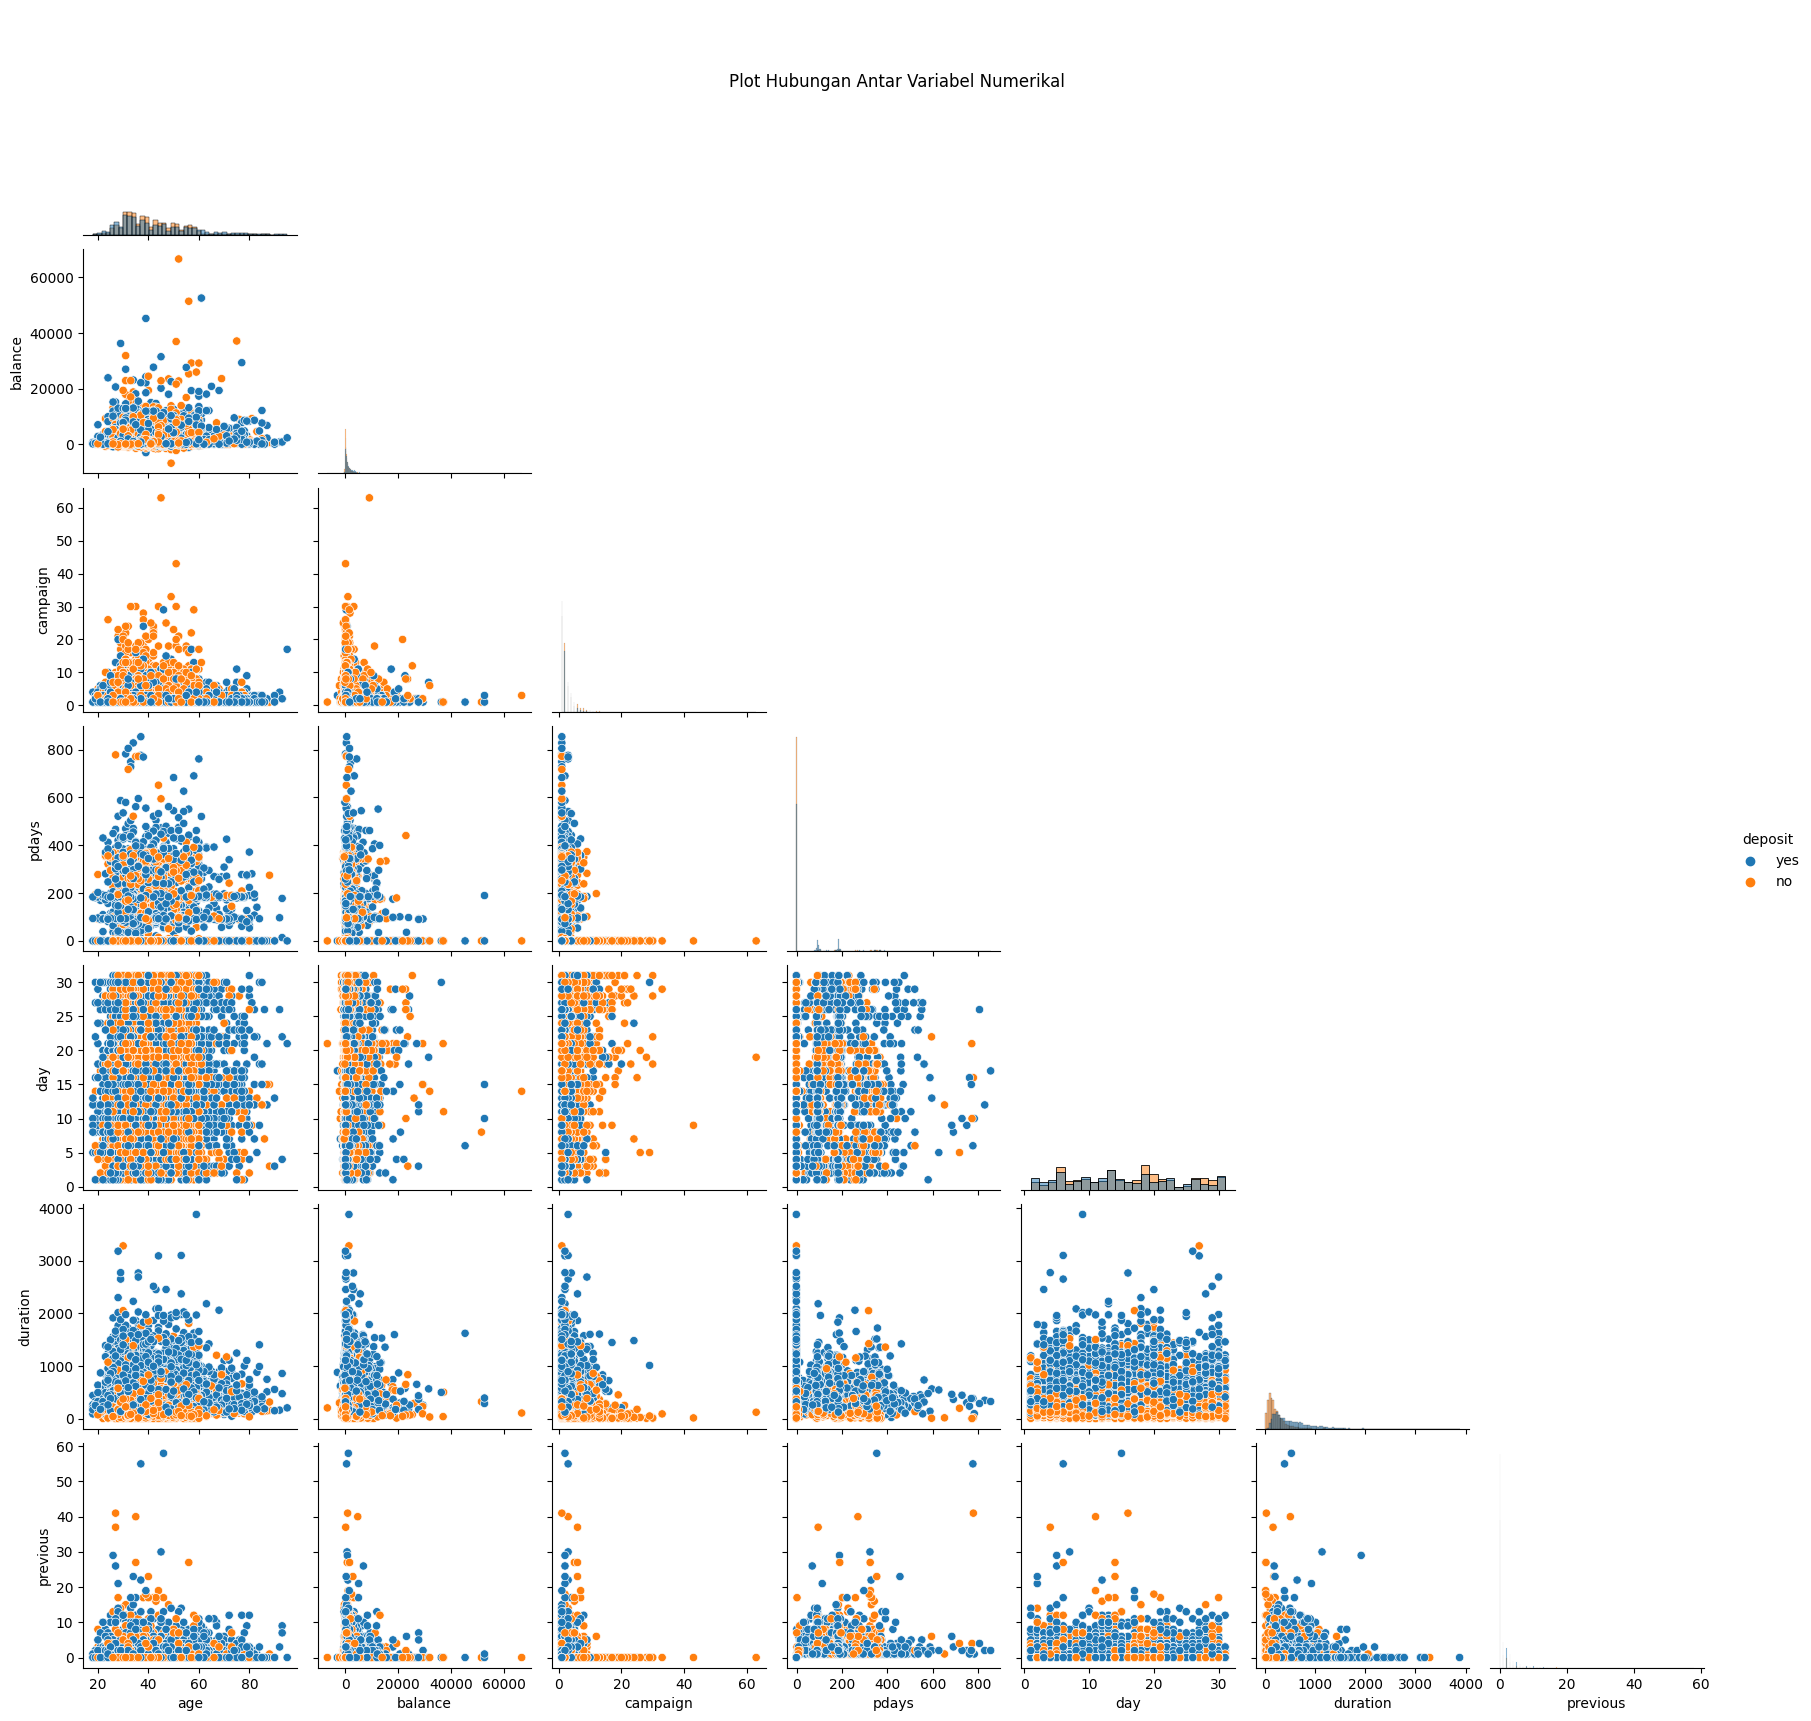

In [15]:
graph = sns.pairplot(data, corner=True, hue='deposit', diag_kind='hist')
graph.fig.suptitle("Plot Hubungan Antar Variabel Numerikal", y=0.95)
plt.show()


 - continou = age, balance, duration
 - discrete = campaign, pdays, previous, day


__Insight :__
* Distribusi data dari masing-masing variabel tidak normal
* Muncul mutlivariate outlier jika data dibandingkan dengan target (deposit)
* Sebaran data pada masing-masing variabel cenderung tinggi
* Skala nilai pada variabel balance dan duration lebih luas, dimana balance (puluhan ribu) dan duration (ribuan)

#### **Categorical variable**

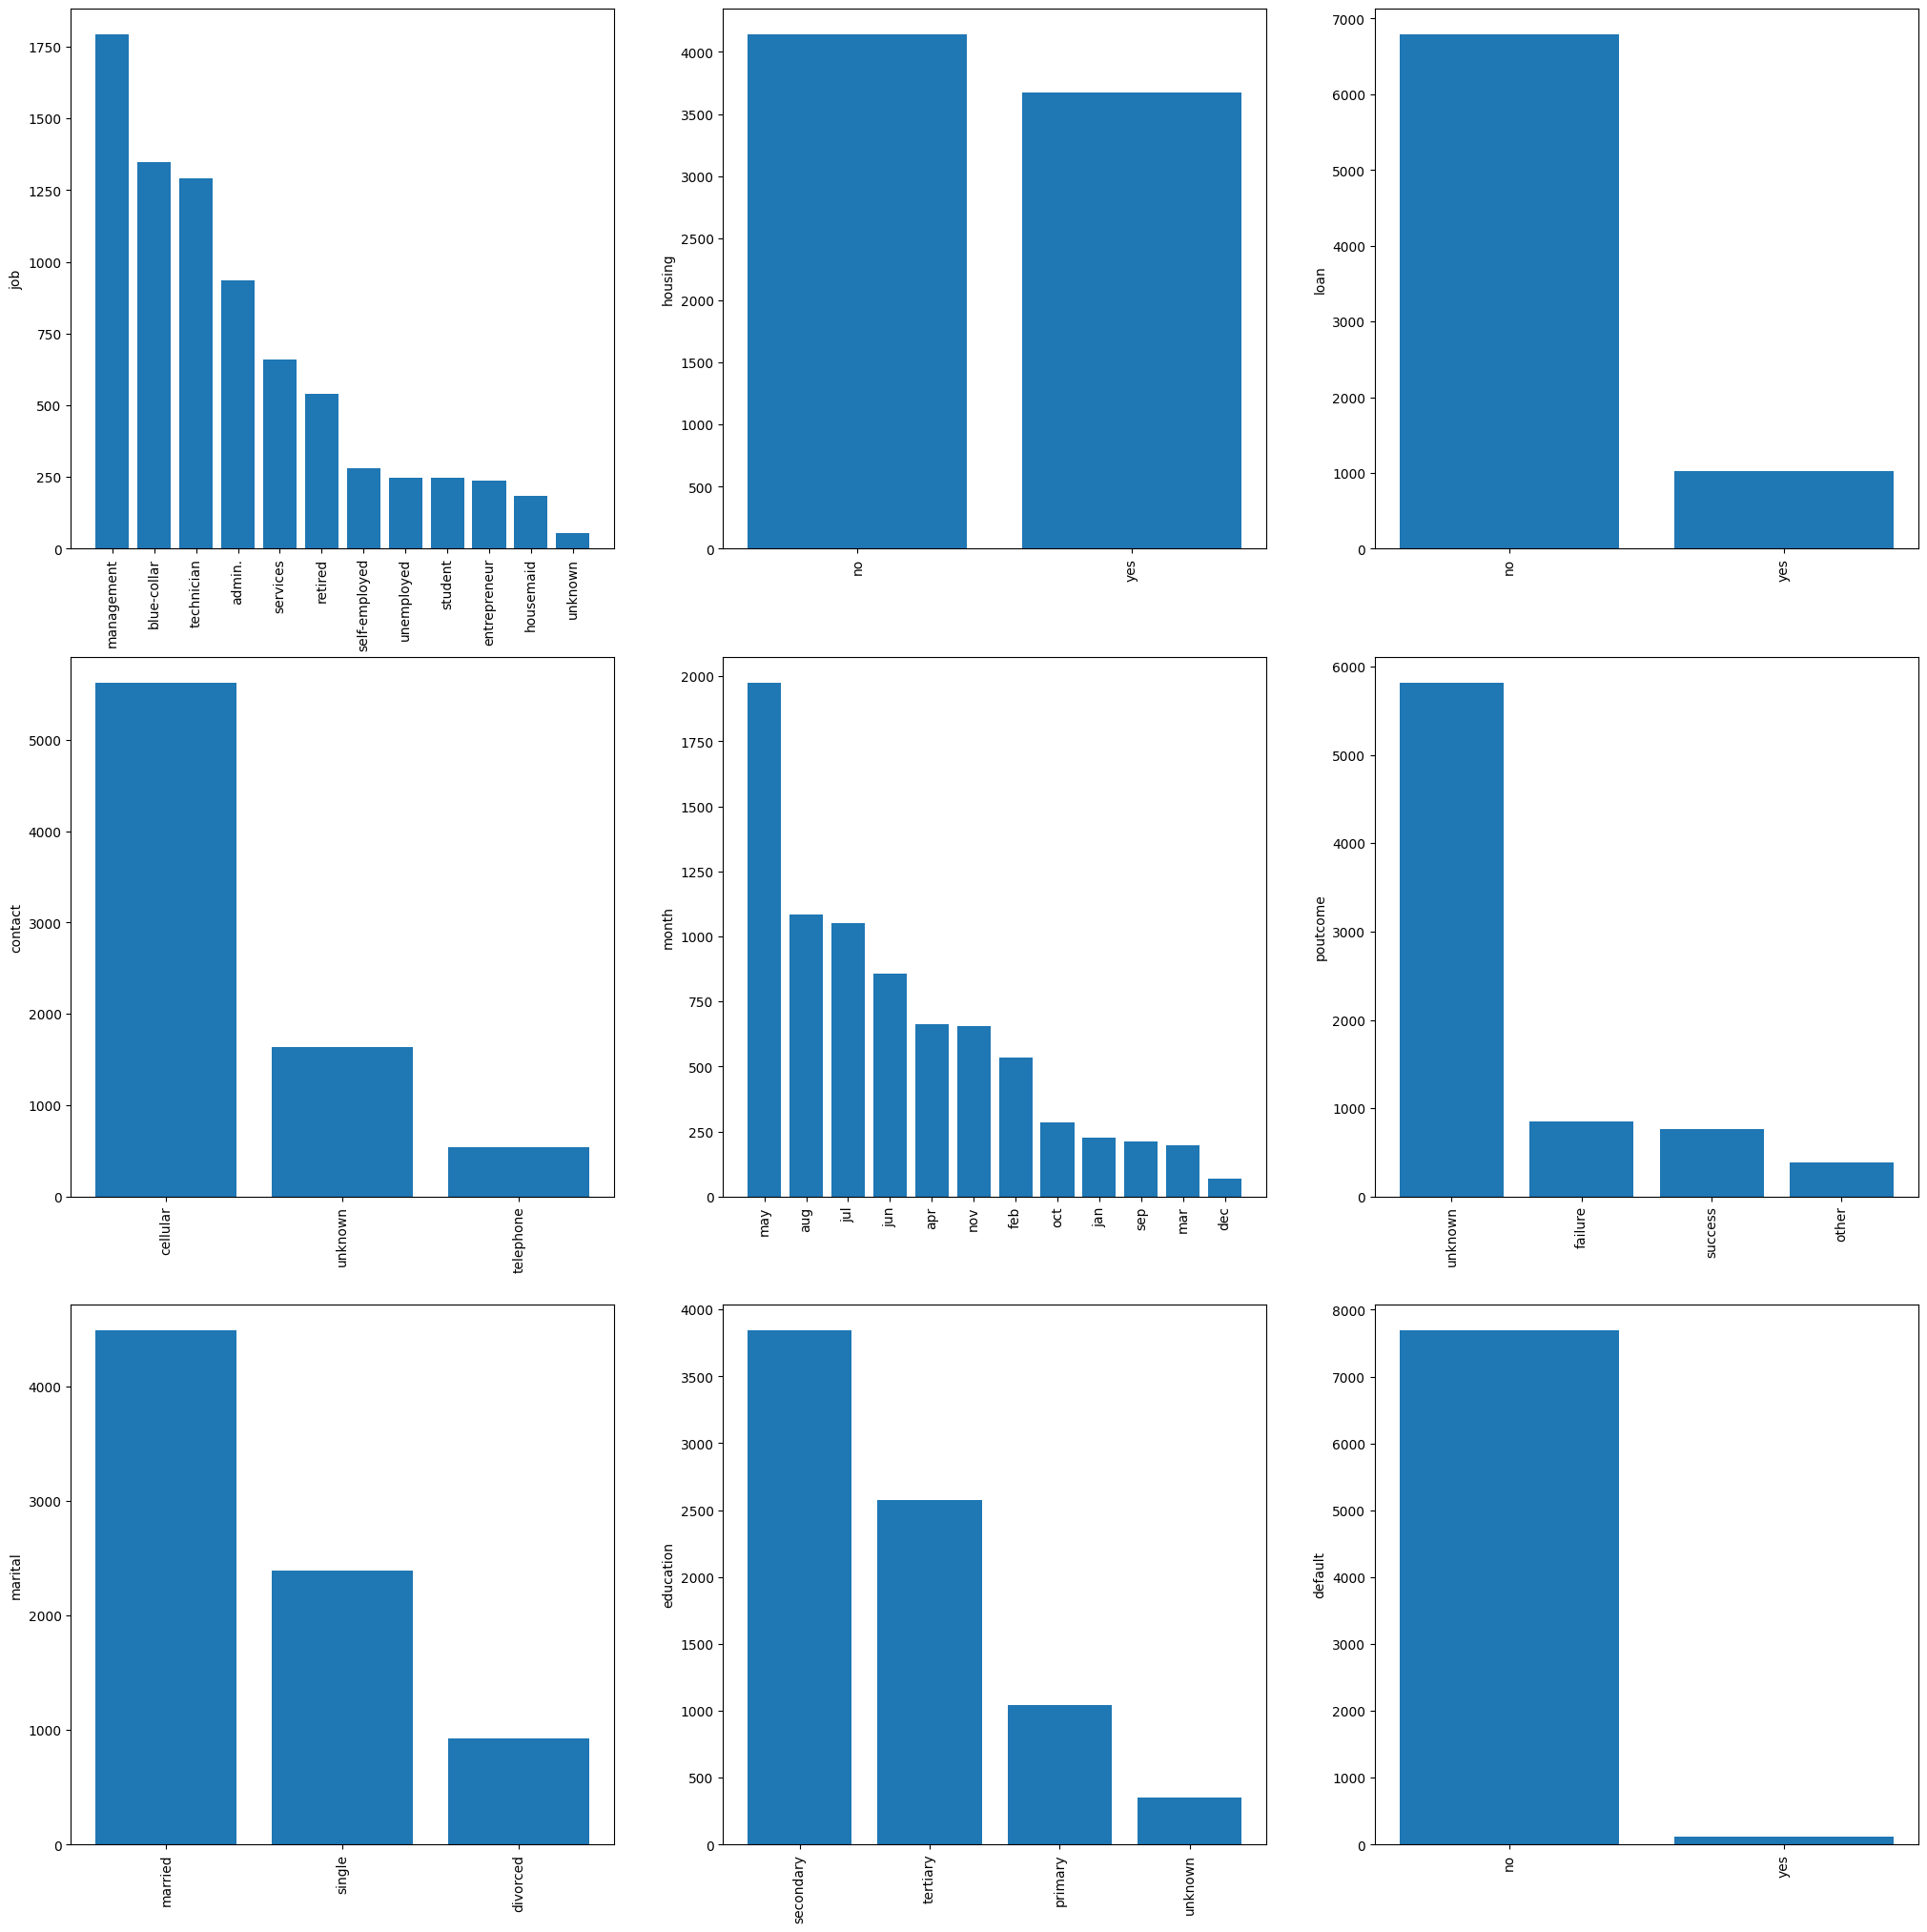

In [16]:
cat_columns = ['job', 'housing', 'loan', 'contact', 'month','poutcome', 'marital', 'education', 'default']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(25, 25))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_ylabel(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1
plt.show()

- ordinal = month, education
- nominal = job, housing, loan, contact, poutcome, deposit, default, marital

__Insight :__
* terdapat 6 kolom variabel kategorikal
* pada kolom **job, contact, poutcome** terdapat value yang mendominasi. Nantinya akan dicheck secara rare value dan akan dihandle jika memang handling
* Pada kolom **job**, value management mendominasi yang berarti bahwa pekerjaan sebagai "management" memiliki ketertarikan yang tinggi untuk membuka rekening deposito
* Pada kolom **contact**, value celluler mendominasi yang berarti bahwa bank paling efektif menghubungi nasabah lewat handphone 

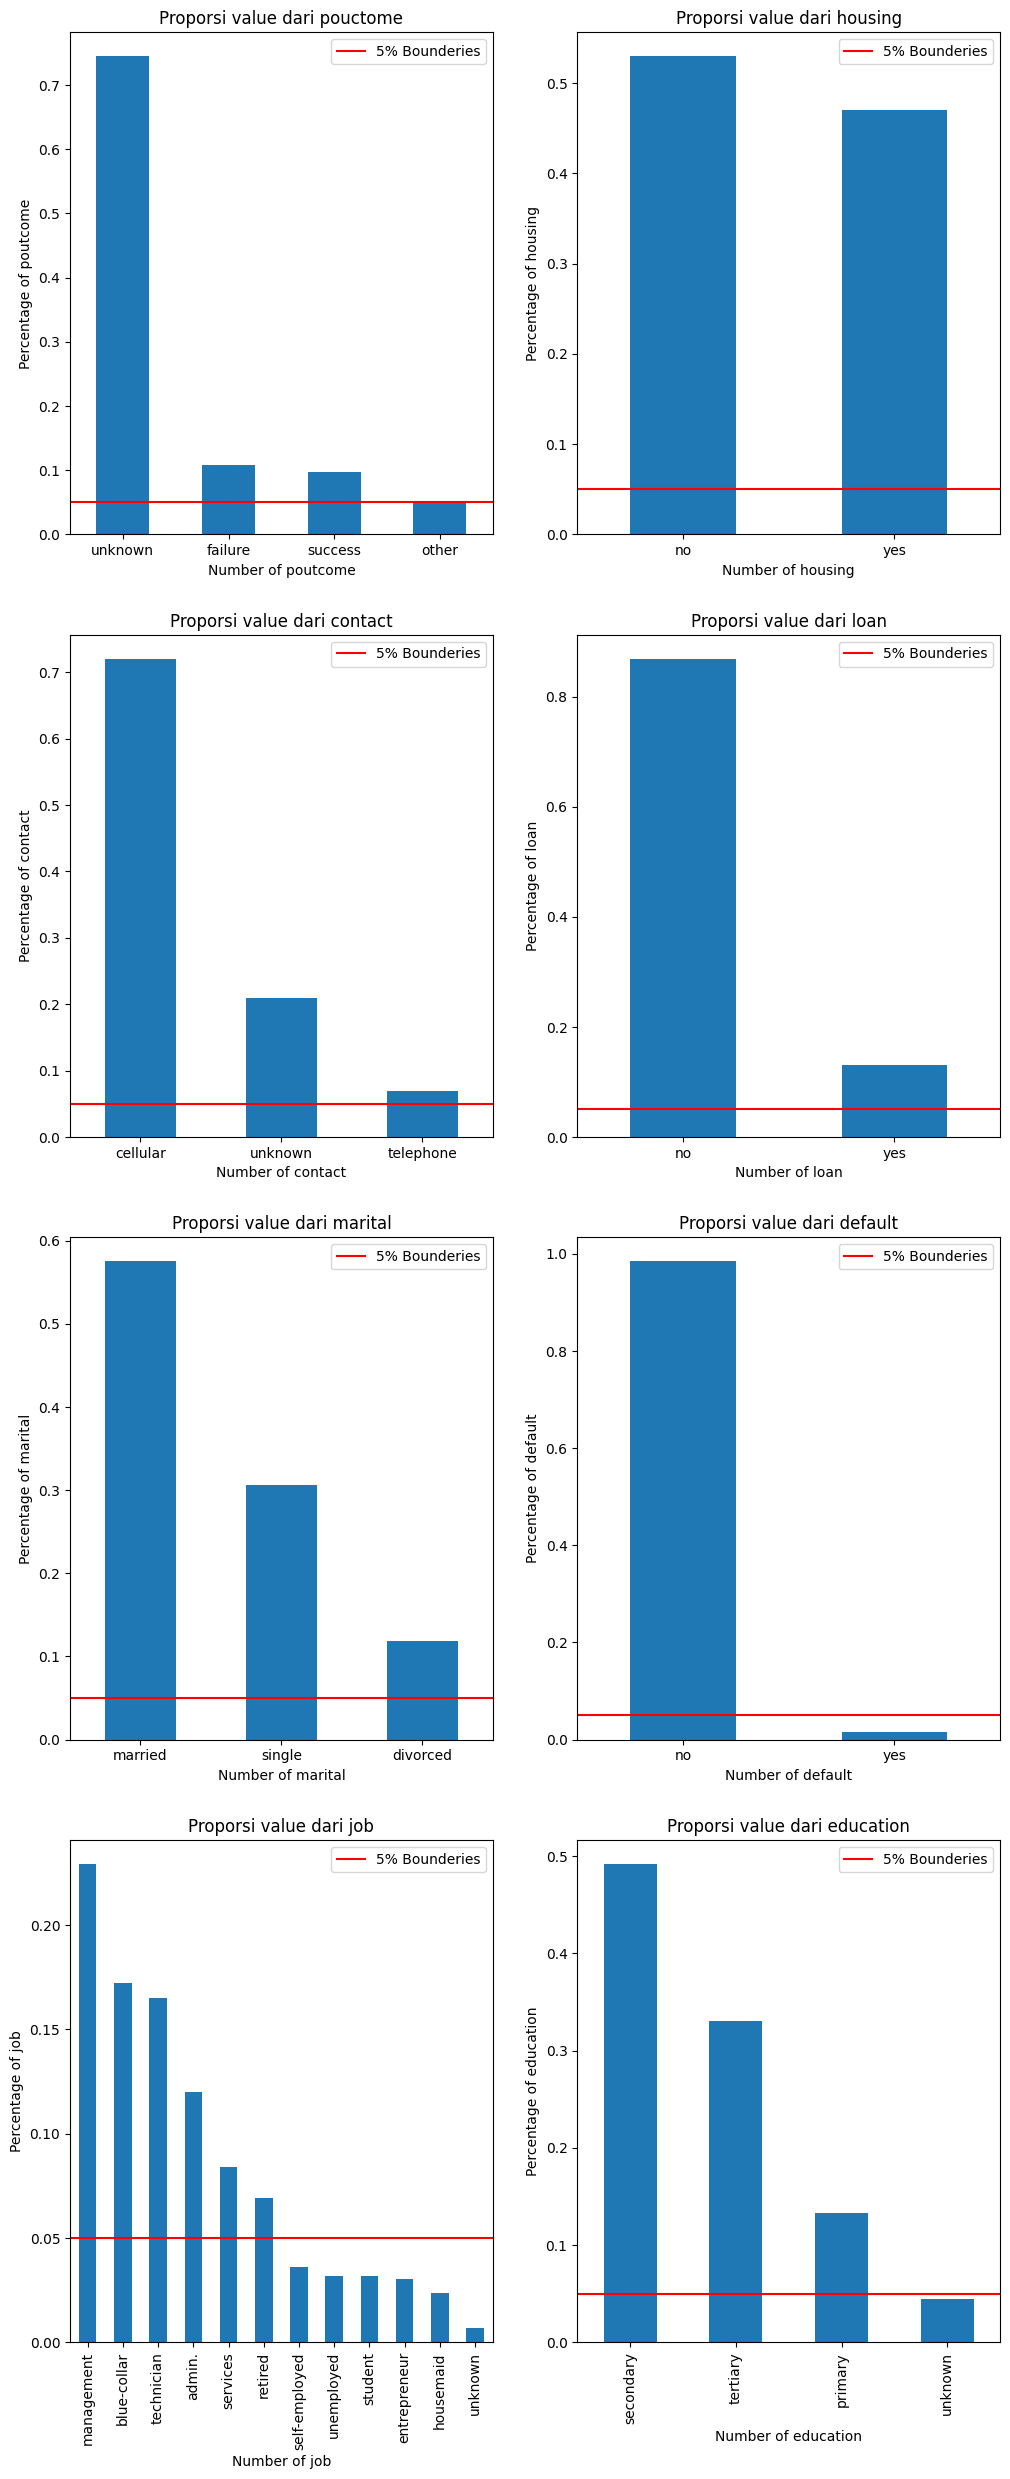

In [17]:
# kolom 'job', 'housing', 'loan', 'contact', 'month','poutcome'
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6), (ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(12,30))

row1 = [ax1,ax2]
row2 = [ax3, ax4]
row3 = [ax5, ax6]
row4 = [ax7, ax8]
col1 = ['poutcome', 'housing']
col2 = ['contact', 'loan']
col3 = ['marital','default']
col4 = ['job', 'education']
title1 = ['Proporsi value dari pouctome','Proporsi value dari housing']
title2 = ['Proporsi value dari contact','Proporsi value dari loan']
title3 = ['Proporsi value dari marital','Proporsi value dari default'] 
title4 = ['Proporsi value dari job','Proporsi value dari education']

for i in zip(row1, row2, row3, row4, col1, col2, col3, col4, title1, title2, title3, title4):
    # DataFrame
    temp_df1 = pd.Series(data[i[4]].value_counts() / len(data)).sort_values(ascending=False).plot(kind='bar', label='', ax=i[0])
    temp_df2 = pd.Series(data[i[5]].value_counts() / len(data)).sort_values(ascending=False).plot(kind='bar', label='', ax=i[1])
    temp_df3 = pd.Series(data[i[6]].value_counts() / len(data)).sort_values(ascending=False).plot(kind='bar', label='', ax=i[2])
    temp_df4 = pd.Series(data[i[7]].value_counts() / len(data)).sort_values(ascending=False).plot(kind='bar', label='', ax=i[3])
    # set title
    i[0].set_title(i[-4])
    i[1].set_title(i[-3])
    i[2].set_title(i[-2])
    i[3].set_title(i[-1])
    # horizontal line: boundary yang digunakan adalah 5%, di bawah 5% akan diasumsikan sebagai rare value
    i[0].axhline(y=0.05, color='red', label='5% Bounderies')
    i[1].axhline(y=0.05, color='red', label='5% Bounderies')
    i[2].axhline(y=0.05, color='red', label='5% Bounderies')
    i[3].axhline(y=0.05, color='red', label='5% Bounderies')
    # set x label and its rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    i[2].tick_params(axis='x', labelrotation=360)
    i[3].tick_params(axis='x', labelrotation=90)
    i[0].set_xlabel(f"Number of {i[4]}")
    i[1].set_xlabel(f"Number of {i[5]}")
    i[2].set_xlabel(f"Number of {i[6]}")
    i[3].set_xlabel(f"Number of {i[7]}")
    # ylabel
    i[0].set_ylabel(f'Percentage of {i[4]}')
    i[1].set_ylabel(f'Percentage of {i[5]}')
    i[2].set_ylabel(f'Percentage of {i[6]}')
    i[3].set_ylabel(f'Percentage of {i[7]}')
    # legend
    i[0].legend()
    i[1].legend()
    i[2].legend()
    i[3].legend()

Handling rare value:

* Kolom yang terdapat rare value yaitu pada kolom **job**
* Pada kolom **job** dengan kategori **entrepreneur** akan digabungkan dengan **self-employed** karena **entrepreneur** salah satu bentuk **self-employed**
* Pada kolom **job** dengan kategori**student**, **retired**, **unknown** akan digabungkan dengan **unemployed**, karena asumsi bahwa student dan orang yang telah pensiun tidak memiliki pekerjaan pada saat itu. Dan untuk kategori **unknown** juga diasumsikan tidak memiliki pekerjaan karena tidak diketahui pekerjaannya.
* Pada kolom **job** dengan kategori **housemaid** akan digabungkan dengan **services**, karena asumsi bahwa housemaid adalah salah satu jenis pekerjaan **services**
* Pada kolo **education** dengan kategori **unknown** akan tetap dibiarkan karena tidak dapat didefinisikan

### `Data Preparation`

In [18]:
df = data.copy()
df.sample(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,marital,education,default,day,duration,previous,deposit
6816,59,management,4412,no,no,cellular,nov,2,-1,unknown,married,secondary,no,2,162,0,yes
6775,27,management,802,no,no,cellular,sep,1,-1,unknown,married,tertiary,no,22,569,0,yes
1113,21,student,123,no,no,telephone,nov,1,91,success,single,secondary,no,11,513,1,yes
6801,37,services,217,yes,no,cellular,may,1,-1,unknown,married,secondary,no,11,152,0,no
6983,43,unknown,1517,no,no,unknown,jun,1,-1,unknown,married,unknown,no,20,45,0,no


#### **Data Wrangling**

In [19]:
df['deposit'] = df['deposit'].replace({'no':0,'yes':1})

**Missing Value**

Deteksi dan kuantifikasi missing value:

In [20]:
df.isna().sum()

age          0
job          0
balance      0
housing      0
loan         0
contact      0
month        0
campaign     0
pdays        0
poutcome     0
marital      0
education    0
default      0
day          0
duration     0
previous     0
deposit      0
dtype: int64

__Insight :__ 
* Tidak terdapat missing value pada dataset

**Rare label**

Deteksi dan kuantifikasi rare value:

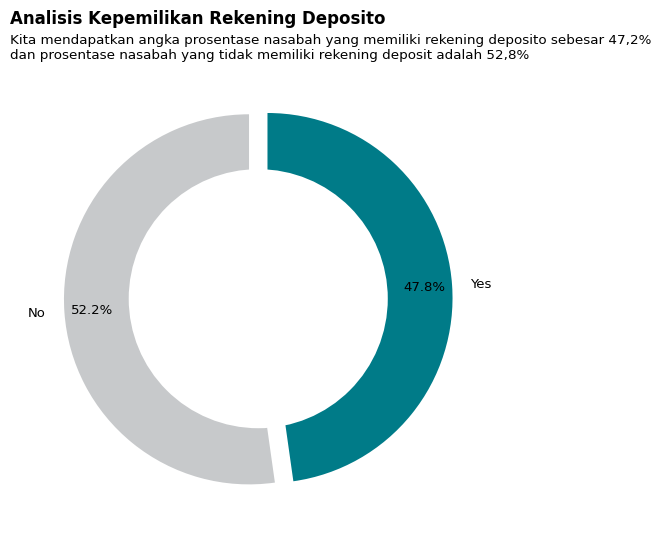

In [21]:
# calculate the customers that have accepted campaign once or more and the customers that never accepted
value_dep = df['deposit'].value_counts()

# initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.9)

# add title
fig.text(
    0, 1.05, "Analisis Kepemilikan Rekening Deposito", 
    fontsize=12,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 0.98, 
    f'''Kita mendapatkan angka prosentase nasabah yang memiliki rekening deposito sebesar 47,2%
dan prosentase nasabah yang tidak memiliki rekening deposit adalah 52,8%''',
    fontsize=9.7, 
    color='black'
)

# create pie chart
plt.pie(value_dep, 
        colors=["#C7C9CB", '#007b88'],
        labels=['No', 'Yes' ], 
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=0.85, 
        explode=(0.05, 0.05),
        textprops = {"fontsize": 9.5},
)

# create a circle at the center of the plot
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))

# show
plt.tight_layout()
plt.show()

__Insight :__ 
* Data nasabah yang membuka rekening deposito ada 3732 orang dengan prosentase 47,8% 
* Data nasabah yang tidak membuka rekening deposito ada 4081 orang dengan prosentase 52,2% 
* Target data bisa dikatakan balance karena prosentase yang membuka deposito dan tidak hampir sama

**Outlier** 

Deteksi dan kuantifikasi outlier per kolom:

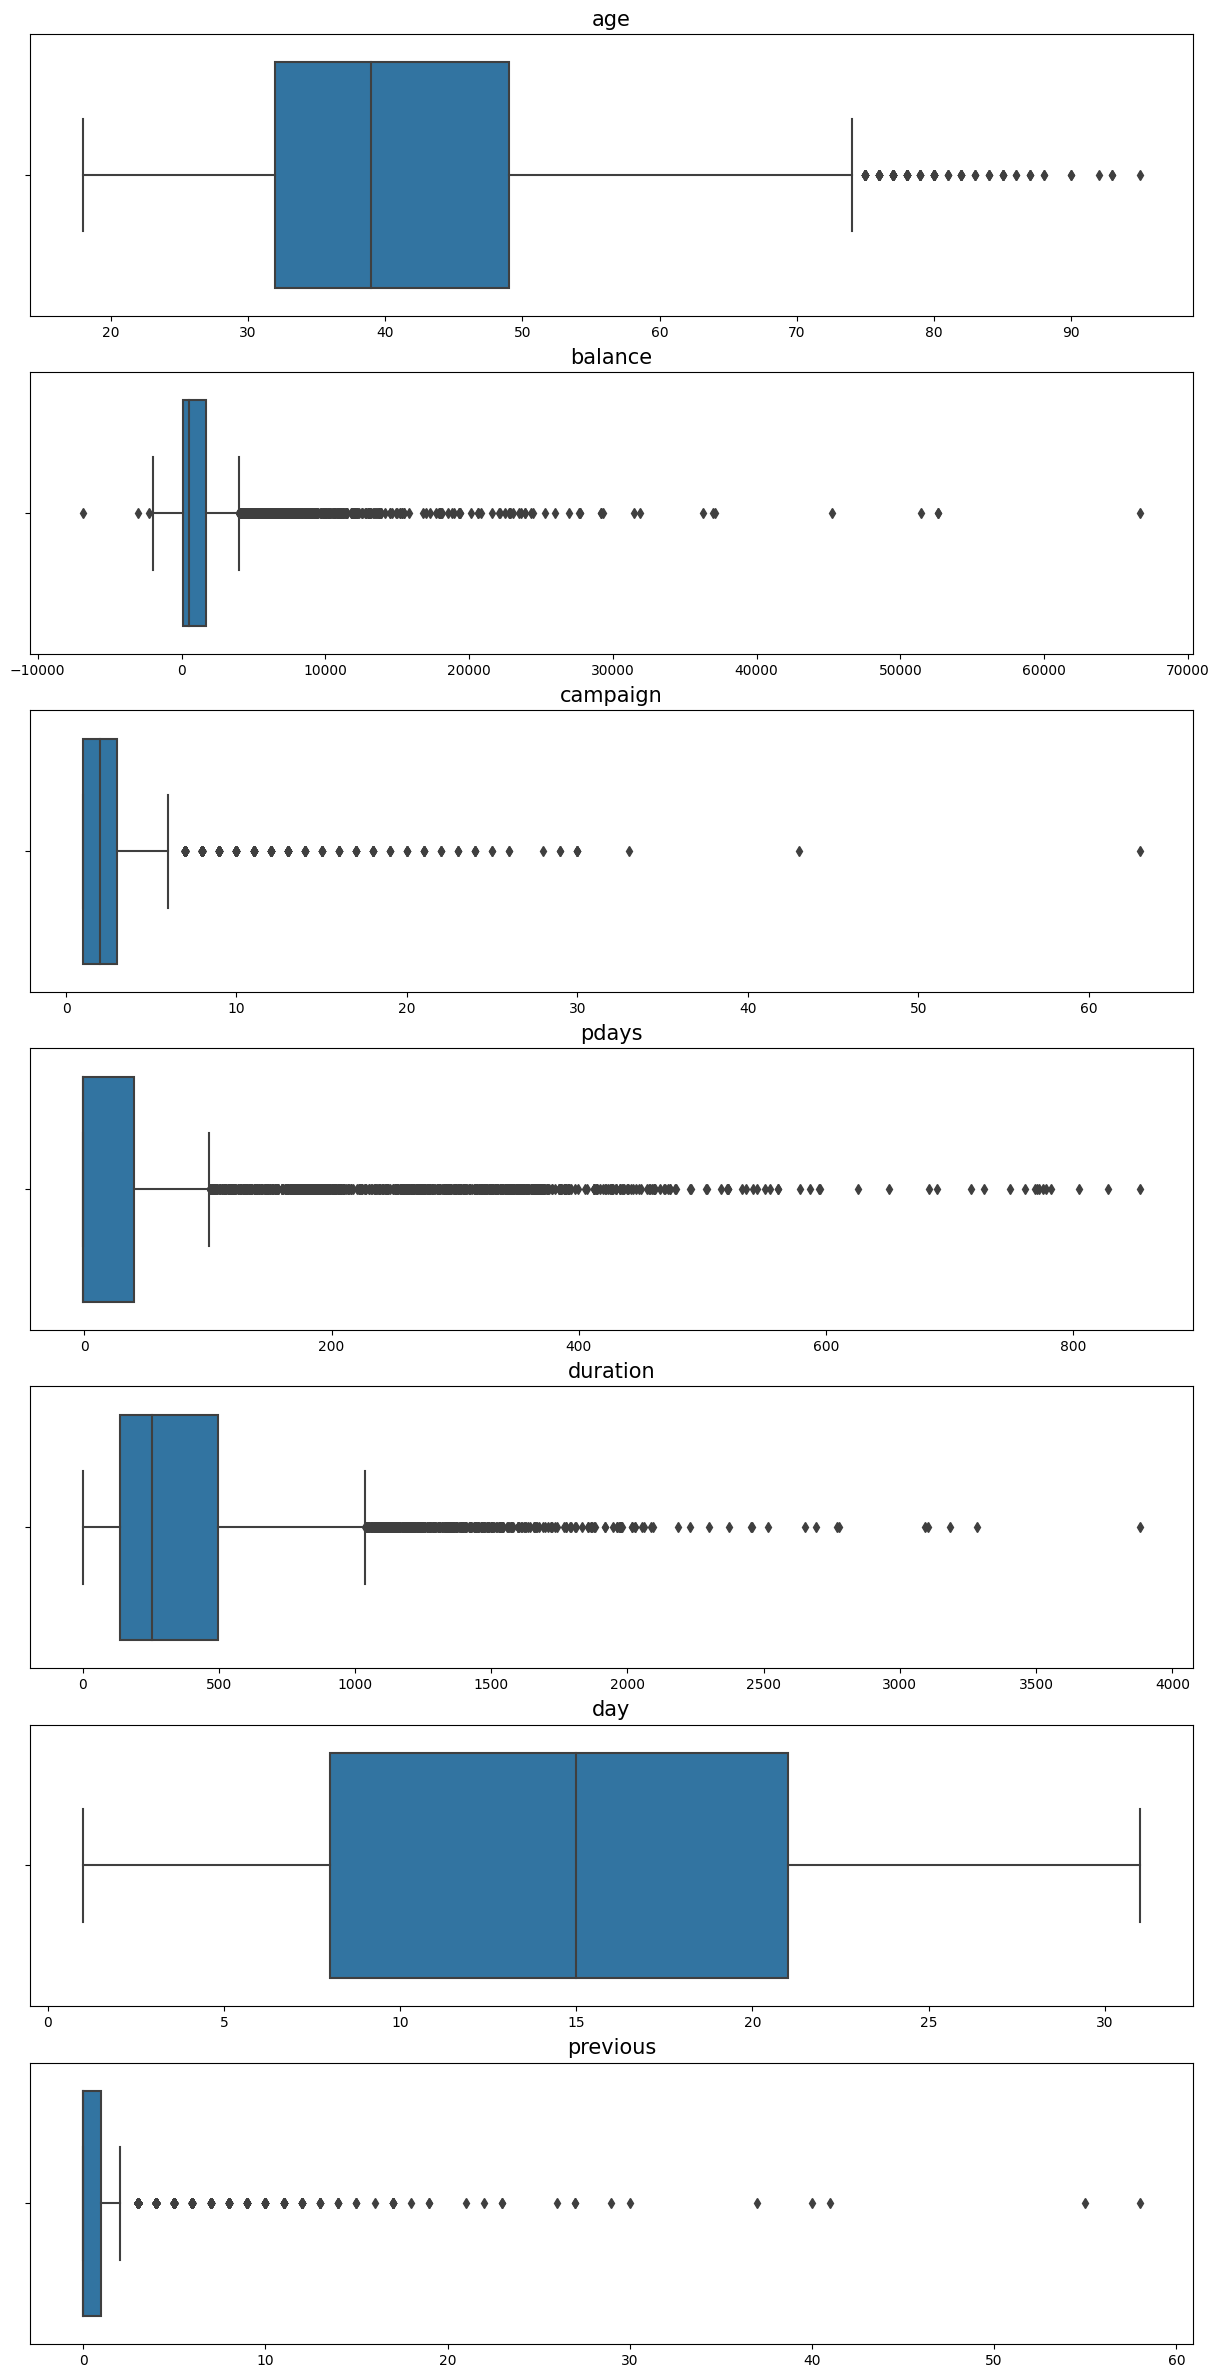

In [22]:
fig, axes = plt.subplots(7, 1, figsize=(15,30))

num_columns = data[['age', 'balance', 'campaign', 'pdays', 'duration', 'day', 'previous']]

for i, j in zip(num_columns, axes.flatten()):
    # print(i)
    sns.boxplot(data=data, x= i, ax= j)
    j.set_xlabel('')
    j.set_title(i, size= 15)


Deteksi dan kuantifikasi outlier multivariate:

In [23]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import category_encoders as ce
#pisahkan target dan feature
out = data.drop(columns='deposit')

# encoding kategorikal kolom
binary_encoder = ce.BinaryEncoder(cols=['job', 'housing',  'loan', 'contact', 'month', 'poutcome'])
dfbin = binary_encoder.fit_transform(out[['job', 'housing',  'loan', 'contact', 'month', 'poutcome']])

from sklearn.neighbours import knn 



In [24]:
# from sklearn.neighbors import NearestNeighbors


# knn = NearestNeighbors() 
# knn.fit(df)



In [25]:
# from pycaret.anomaly import *

# anomaly = setup(session_id =0,
#                 data=df,
                
#                 normalize=True,
#                 normalize_method='zscore')

# outknn = create_model('knn')
# df = assign_model(outknn)
# plot_model(outknn, plot='umap')

# # print(f"Jumlah total outliers ada : {len(df[df['Anomaly']== 1])}")


In [26]:
# df.Anomaly.value_counts()

Handling outlier:

In [27]:
# df = df[df['Anomaly']== 0]
# df = df.drop(columns=['Anomaly', 'Anomaly_Score'])
# df

__Insight :__
* ....
* ....
* ....

**Problematic Data Value**

Deteksi dan kuantifikasi data problematik pada kolom pdays :

In [28]:
df[df['pdays'] == -1]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,marital,education,default,day,duration,previous,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,married,secondary,no,4,94,0,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,married,tertiary,no,17,882,0,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,single,primary,no,13,531,0,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,married,secondary,no,18,176,0,0
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,married,secondary,no,16,263,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,married,tertiary,no,14,83,0,0
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,married,secondary,no,3,322,0,1
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,married,secondary,no,8,14,0,0
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,married,secondary,no,21,226,0,0


__Insight :__
* Terdapat data dengan value minus (-) yaitu -1 yang memiliki arti nasabah tersebut tidak pernah dihubungi dilihat dari campaign terakhir sejumlah 5817 data
* Handling problematik data akan dilakukan pada pycaret dengan mengganti -1 menjadi 0 

Deteksi dan kuantifikasi data problematik yang memiliki value unknown :

In [29]:
Columns = []
Unknown = []
percentUnknown = []

for i in cat_columns:
    unknown = df[i].str.contains('unknown').sum()
    Unknown.append(unknown)

    percent_unknown = (unknown / len(df) * 100).round(2)
    percentUnknown.append(percent_unknown)

    Columns.append(i)

pd.DataFrame({
    'Columns' : Columns,
    'Number of unknown' : Unknown,
    '% unknown' : percentUnknown
}
)

,Columns,Number of unknown,% unknown
0,job,54,0.69
1,housing,0,0.00
2,loan,0,0.00
3,contact,1639,20.98
4,month,0,0.00
5,poutcome,5819,74.48
6,marital,0,0.00
7,education,351,4.49
8,default,0,0.00


__Insight :__
* Terdapat 54 data dengan value unknown pada column **job** dengan prosentase 0,69%
* Terdapat 1639 data dengan value unknown pada column **contact** dengan prosentase 20.98%
* Terdapat 5819 data dengan value unknown pada column **poutcome** dengan prosentase 74.48%
* Handling problematik data pada column **job** akan dilakukan pada pycaret dengan mengganti unknown menjadi unemployed karena pekerjaannya tidak diketahui maka akan di masukkan pada kategori **unemployed**
* Handling problematik data pada colum **poutcome** akan dilakukan pada pycaret dengan mengganti unknown menjadi other untuk menyederhanakan karena kategori other juga sudah tersedia sebelumnya 
* Pada column **contact** dan **education** akan tetap dibiarkan unknown karena memang tidak bisa didefinisikan

**Duplicated Value**

Deteksi dan kuantifikasi data duplikat :

In [30]:
df[df.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,marital,education,default,day,duration,previous,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,married,secondary,no,16,167,0,0
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,divorced,secondary,no,5,603,0,1
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,divorced,secondary,no,6,438,0,0
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,single,primary,no,24,184,0,0
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,married,secondary,no,5,203,0,0
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,single,secondary,no,22,305,0,0
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,married,tertiary,no,29,120,0,0
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,single,secondary,yes,21,412,0,1


Handling data duplikat :

In [31]:
df = df.drop_duplicates(keep='last', ignore_index=True)

#### **Feature Engineering**

Bagi dataset menjadi train set dan test set:

In [32]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

df_train.shape, df_test.shape

((5463, 17), (2342, 17))

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

class clearAll(BaseEstimator, TransformerMixin):
    
    def _init_(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Replace value -1 menjadi 0 pada column job
        X["pdays"].replace(-1, 0, inplace=True) 

        # Replace value entrepreneur, student, retired, unknown, dan housemaid pada column job
        X['job'].replace({"entrepreneur" : "self-employed",
                          "student": "unemployed",
                          "retired": "unemployed",   
                          "unknown" : "unemployed",
                          "housemaid": "services"},
                          inplace= True)


        # Replace value month
        X['month'].replace({"jan": 1,
                            "feb": 2,
                            "mar": 3,
                            "apr": 4,
                            "may": 5,
                            "jun": 6,
                            "jul": 7,
                            "aug": 8,
                            "sep": 9,
                            "oct": 10,
                            "nov": 11,
                            "dec": 12},inplace= True)

        # Replace value unknown menjadi other pada column poutcome
        X['poutcome'].replace("unknown", "other", inplace= True)

        X['education'].replace("unknown", 'other', inplace=True)

        X['age'] = pd.cut(X['age'], bins=4, labels=['young','early-middle','late-middle','old'])
        
        # X['balance'] = pd.cut(X['balance'], bins=4, labels=['very-low','low','medium','high'])
        return X.to_numpy()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
class CustomPolynomialTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, degree=2, interaction_only=False, features=None):
        self.degree = degree
        self.interaction_only = interaction_only
        self.features = features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.features is None:
            return X

        # Ambil subset fitur yang ingin diubah menjadi fitur polynomial
        X_subset = X[self.features]

        poly = PolynomialFeatures(degree=self.degree, interaction_only=self.interaction_only, include_bias=False)
        X_poly = poly.fit_transform(X_subset)

        # Gabungkan fitur polynomial dengan fitur lainnya
        X_other = X.drop(columns=self.features)
        X_poly_combined = np.hstack((X_poly, X_other.values))

        return X_poly_combined

In [35]:
# Membuat pipeline transformasi

from sklearn.preprocessing import RobustScaler
from pycaret.internal.preprocess.transformers import TransformerWrapper #Melakukan transformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

customPipeline = [
    ("clearAll", TransformerWrapper(include=['job', 'poutcome', 'pdays', 'month', 'age', 'education'], transformer=clearAll())),
    ('scaleler', TransformerWrapper(include=['pdays', 'duration', 'balance', 'day'], transformer=MinMaxScaler((0,1)))),
    ('onehot', TransformerWrapper(include=['poutcome', 'contact', 'marital','housing', 'loan', 'default'], transformer=OneHotEncoder())),
    ('binary', TransformerWrapper(include=['job'], transformer=ce.BinaryEncoder())),
    ('ordinal', TransformerWrapper(include=['month', 'education', 'age'], transformer=OrdinalEncoder())),
    # ('polynomial_features', CustomPolynomialTransformer(degree=2, interaction_only=False, features=['duration'])),   
]

In [36]:
# Setting parameter dasar menggunakan pycaret
# import pycaret
from pycaret.classification import *

clf = setup(
    # general setup
    data=df_train, 
    target='deposit',
    train_size=0.7,
    verbose=True,
    preprocess=False,
    numeric_features= ['age', 'balance', 'month', 'campaign', 'pdays', 'day', 'duration', 'previous'],
    categorical_features = ['job','contact', 'poutcome', 'education', 'marital','housing', 'loan', 'default'],
    # group_features = [[]],
    
    # feature setup
    # ignore_features=[],

    # experiment setup
    session_id=42,
    log_experiment='dagshub', 
    log_data=True,
    log_plots=True,

    # data wrangling
    # ignore_features=['marital', 'month', 'day', 'age', 'previous', 'education', 'campaign'],
    # remove_outliers=True,
    outliers_method='iforest',
    outliers_threshold=0.05,
    custom_pipeline=customPipeline,
    custom_pipeline_position=0,
)

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(5463, 17)"
4,Transformed data shape,"(5463, 28)"
5,Transformed train set shape,"(3824, 28)"
6,Transformed test set shape,"(1639, 28)"
7,Numeric features,8
8,Categorical features,8


Repository initialized!

Uploading files (2) to "fdkurnianto/Capstone_project3"...

Upload finished successfully!

In [37]:
len(get_config('dataset_transformed').columns)

28

Proses scaling dan encoding:

Feature Creation:

Feature Selection:

### `Modeling`

**Model Experiment**

Bandingkan model regresi atau klasifikasi untuk mendapatkan benchmark model:

In [38]:
from sklearn.metrics import fbeta_score

add_metric('f2', 'F2', fbeta_score, greater_is_better=True, target='pred', beta=2.0)
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x000001CE718F99D0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x000001CE718F9...,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x000001CE718F9...,make_scorer(matthews_corrcoef),pred,{},True,True,False
f2,F2,F2,<function fbeta_score at 0x000001CE718F9DC0>,"make_scorer(fbeta_score, beta=2.0)",pred,{'beta': 2.0},True,True,True


In [39]:
compare_models(include=['lr', 'gbc', 'ada', 'lightgbm', 'ridge', 'dt', 'rf', 'knn'], )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:14:23
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8603,0.9206,0.8851,0.8339,0.8586,0.7209,0.7224,0.8743,7.7090
gbc,Gradient Boosting Classifier,0.8475,0.9169,0.8632,0.8263,0.8441,0.6951,0.6961,0.8554,8.2490
rf,Random Forest Classifier,0.8386,0.9076,0.8599,0.8138,0.8361,0.6774,0.6787,0.8502,8.5930
ada,Ada Boost Classifier,0.8232,0.8956,0.8129,0.8169,0.8147,0.6457,0.6460,0.8136,8.5120
lr,Logistic Regression,0.7955,0.8794,0.7445,0.8127,0.7768,0.5888,0.5911,0.7570,8.9090
ridge,Ridge Classifier,0.7937,0.0000,0.7248,0.8234,0.7707,0.5845,0.5887,0.7425,8.2750
dt,Decision Tree Classifier,0.7665,0.7657,0.7478,0.7615,0.7542,0.5318,0.5324,0.7502,8.0750
knn,K Neighbors Classifier,0.6825,0.7294,0.6246,0.6842,0.6523,0.3614,0.3633,0.6352,8.1250


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [40]:
/aa

NameError: name 'aa' is not defined

In [41]:
lightgbm = create_model('lightgbm', cross_validation=True, return_train_score=True )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:29:52
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
param_grid = {
    'num_leaves': [20, 30, 31],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1, 0.2, 0.5, 1, 2],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [ 0.1, 1, 10, 100, 1000],
    'reg_lambda': [0.1, 1, 10, 100, 1000],
}

tuned_lgbm = tune_model(
    estimator=lightgbm, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:20:34
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [42]:
gbc = create_model('gbc', cross_validation=True, return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
param_grid = {
    'max_depth': [ 1, 5],
    'learning_rate': [0.05, 0.1, 0.2, 0.5, 1, 2],
    'n_estimators': [50, 100, 200],
    'max_features' : [10, 15, 20, 25, 28]
}


tuned_gbc = tune_model(
    estimator=gbc, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
rf = create_model('rf', cross_validation=True, return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [25, 50, 75, 100],
    'min_samples_leaf': [20, 40, 60, 80, 100],
    'max_features': [10, 15, 20, 25, 28]
}

tuned_rf = tune_model(
    estimator=rf, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


Lakukan optimasi model benchmark:

Validasi silang 10-fold untuk mendapatkan rentang kinerja model:

**Model Evaluation**

**Model Intepretation**

* .....
* .....
* .....

**Model Limitation**

* .....
* .....
* .....


### `Conclusion`

Beberapa hal yang dapat disimpulkan yaitu:

* ....
* ....
* ....

### `Recommendations`

Hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

* ....
* ....
* ....